# Example Python API Usage

## Retrieve Article Information and PubTator Annotations

### Query PubTator with Keywords and Retrieve the Resulting Article Collection


In [ ]:
from netmedex.pubtator import PubTatorAPI

collection = await PubTatorAPI(
    # Use double quotes ("") to enclose keywords that contain spaces.
    query='"covid-19" AND "PON1"',
    sort="score",
    max_articles=100,
).arun()

Query: "covid-19" AND "PON1"


Find 160 articles
Requesting 100 articles...
Step 1/2: Requesting article PMIDs...


  0%|          | 0/100 [00:00<?, ?it/s]

Step 2/2: Requesting article annotations...


  0%|          | 0/100 [00:00<?, ?it/s]

### Query PubTator Using Keywords and Retrieve Only the PMIDs of the Resulting Articles


In [9]:
from netmedex.pubtator import PubTatorAPI

collection = await PubTatorAPI(
    query='"covid-19" AND "PON1"',
    sort="score",
    return_pmid_only=True,
    max_articles=100,
).arun()

pmid_list = collection.metadata["pmid_list"]

Query: "covid-19" AND "PON1"
Find 160 articles
Requesting 100 articles...
Step 1/1: Requesting article PMIDs...


  0%|          | 0/100 [00:00<?, ?it/s]

### Retrieve Articles from a List of PMIDs


In [11]:
from netmedex.pubtator import PubTatorAPI

pmid_list = [
    "35740079",
    "35883435",
    "37064481",
]
collection = await PubTatorAPI(pmid_list=pmid_list).arun()

Step 1/1: Requesting article annotations...


  0%|          | 0/3 [00:00<?, ?it/s]

## Save Article Collection

### Save as JSON (Recommended for Future Use)


In [11]:
import json

collection_json = collection.to_json()

with open("collection.json", "w") as f:
    json.dump(collection_json, f)

### Save in PubTator Format

_Note: Article metadata, such as publication date and journal, will be lost when converting to PubTator format._


In [8]:
collection_str = collection.to_pubtator_str()

with open("collection.pubtator", "w") as f:
    f.write(collection_str)

## Load Article Collection

### Load from JSON


In [1]:
import json

from netmedex.pubtator_data import PubTatorCollection

with open("collection.json") as f:
    collection_json = json.load(f)

loaded_collection_json = PubTatorCollection.from_json(collection_json)

### Load from PubTator File


In [1]:
from netmedex.pubtator_parser import PubTatorIO

loaded_collection_pubtator = PubTatorIO.parse("collection.pubtator")

## Construct Co-Occurrence Graph


In [6]:
from netmedex.graph import PubTatorGraphBuilder

graph_builder = PubTatorGraphBuilder(node_type="all")
graph_builder.add_collection(loaded_collection_json)
graph = graph_builder.build(
    weighting_method="freq",
    edge_weight_cutoff=1,
    community=False,
)

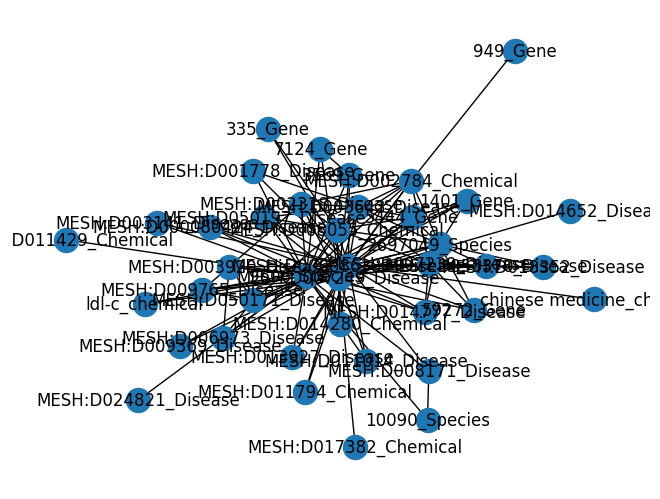

In [7]:
import networkx as nx

nx.draw(graph, with_labels=True)